# Ch. 10 – Semantic

## Figure 10.6. Visualisation of the features of two songs (Help! and Yesterday) by the Beatles within the context of 500 other tracks from 1964-1966 using four high-level features retrieved from Spotify.

This code requires that the user supplements their own `client_id` and
`client_secret` which can be obtained after registering to developer
account for Spotify API. The code will not run without these. However,
the visualisation part of the code works with the save data
(`data/top_n_track_features2.csv`).

In [1]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

## 1. Retrieve Spotify features

In [2]:
client_id = 'YOUR_CLIENT_ID_HERE'
client_secret = 'YOUR_SECRET_KEY_HERE'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                     client_secret=client_secret))

results = sp.search(q='The Beatles', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

track = results['tracks']['items'][18]  # help is 18
print(track['name'])
print(track['href'])
print(track['popularity'])
print("===========PREVIEW===========")
print(track['preview_url'])
print("===========PREVIEW===========")

a = sp.audio_features(track['id'])

print(a[0]['valence'])       # Help!: 0.763, Yesterday: 0.315
print(a[0]['energy'])        # Help!: 0.725, Yesterday: 0.179
print(a[0]['tempo'])         # Help!: 95.003, Yesterday: 96.53
print(a[0]['loudness'])      # Help!: -7.576, Yesterday: -11.83
print(a[0]['acousticness'])  # Help!: 0.188, Yesterday: 0.879

print("===========GENRE===========")
name = []
Tid = []
valence = []
energy = []
tempo = []
loudness = []
instrumentalness = []
acousticness = []
danceability = []

# get 500 tracks, 50 each time
offset_vals = np.arange(1, 500, 10)

for i in range(50):
    results = sp.search(q='genre:pop & year:1964-1966', limit=10, 
                        offset=offset_vals[i])
    for idx, track in enumerate(results['tracks']['items']):
        name.append(track['name'])
        Tid.append(track['id'])
        a = sp.audio_features(track['id'])
        valence.append(a[0]['valence'])
        energy.append(a[0]['energy'])
        instrumentalness.append(a[0]['instrumentalness'])
        acousticness.append(a[0]['acousticness'])
        danceability.append(a[0]['danceability'])
        tempo.append(a[0]['tempo'])
        loudness.append(a[0]['loudness'])
        print(i, ':', idx)

# Store in data frame and save to a file
df = pd.DataFrame({'valence': valence, 'energy': energy, 'tempo': tempo,
                   'acousticness': acousticness,
                   'loudness': loudness, 'id': Tid})
df.to_csv('data/top_n_track_features2.csv')

## 2. Visualise

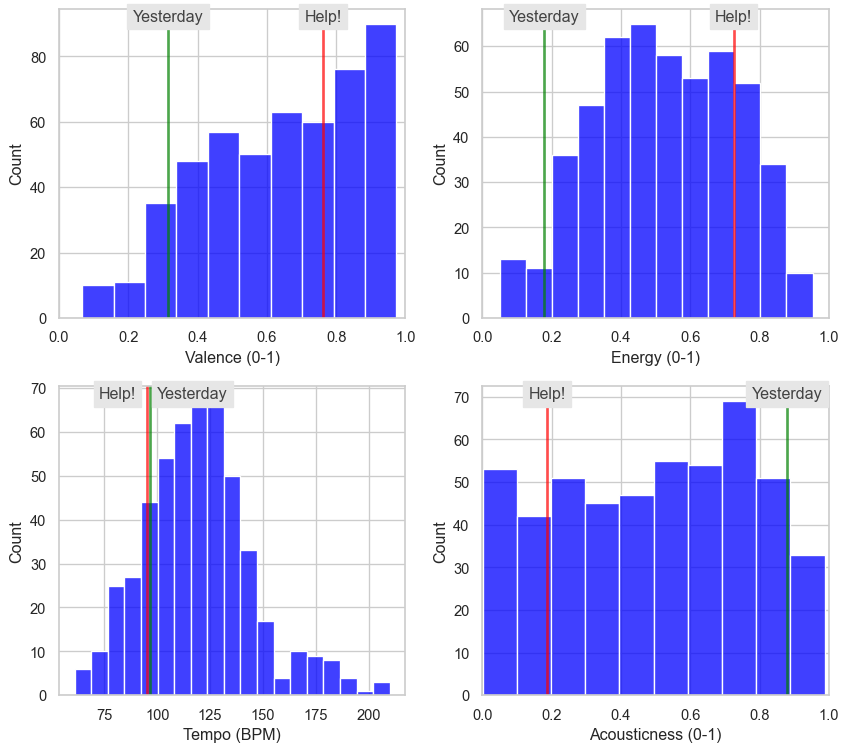

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 


# Get data (from a previous process)
d = pd.read_csv('data/top_n_track_features2.csv')

# set graphic (seaborn) theme
sns.set_theme()
sns.set_style("whitegrid")

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(9)

# Define multiple plots
ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 2), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 0))
ax4 = plt.subplot2grid(shape=(2, 2), loc=(1, 1))

sns.histplot(x='valence', data=d, color='blue', ax=ax1)
ax1.set_xlabel('Valence (0-1)')
ax1.axes.axvline(0.763, color='red', linewidth=2, alpha=.7)
ax1.text(0.763, ax1.get_ylim()[1], "Help!", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax1.axes.axvline(0.315, color='green', linewidth=2, alpha=.7)
ax1.text(0.315, ax1.get_ylim()[1], "Yesterday", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax1.set_xlim([0, 1])
ax1.set_xticks(np.arange(0, 1.1, 0.20)) 

sns.histplot(x='energy', data=d, color='blue', ax=ax2)
ax2.set_xlabel('Energy (0-1)')
ax2.axes.axvline(0.725, color='red', linewidth=2, alpha=.7)
ax2.text(0.725, ax2.get_ylim()[1], "Help!", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax2.axes.axvline(0.179, color='green', linewidth=2, alpha=.7)
ax2.text(0.179, ax2.get_ylim()[1], "Yesterday", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax2.set_xlim([0, 1])
ax2.set_xticks(np.arange(0, 1.1, 0.20)) 

sns.histplot(x='tempo', data=d, color='blue', ax=ax3)
ax3.set_xlabel('Tempo (BPM)')
ax3.axes.axvline(95, color='red', linewidth=2, alpha=.7)
ax3.text(90, ax3.get_ylim()[1], "Help!", size=12, backgroundcolor='0.9',
         ha="right", va="top", alpha=0.85)
ax3.axes.axvline(96.5, color='green', linewidth=2, alpha=.7)
ax3.text(100, ax3.get_ylim()[1], "Yesterday", size=12, backgroundcolor='0.9',
         ha="left", va="top", alpha=0.85)

sns.histplot(x='acousticness', data=d, color='blue', ax=ax4)
ax4.set_xlabel('Acousticness (0-1)')
ax4.axes.axvline(0.188, color='red', linewidth=2, alpha=.7)
ax4.text(0.188, ax4.get_ylim()[1], "Help!", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax4.axes.axvline(0.879, color='green', linewidth=2, alpha=.7)
ax4.text(0.879, ax4.get_ylim()[1], "Yesterday", size=12, backgroundcolor='0.9',
         ha="center", va="top", alpha=0.85)
ax4.set_xlim([0, 1])
ax4.set_xticks(np.arange(0, 1.1, 0.20)) 

fig.tight_layout()
plt.show()